In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('cleaned.csv')
df.head()

,Country,Year,Exports_USD,GDP_USD,High_Tech_Exports_USD,Imports_USD,Industry_Value_Added_USD,Labor_Force,Military_Exp_USD,Population,Researchers_per_Million,Unemployment_Rate,Trade_Balance_USD,GDP_per_Capita_USD,Trade_GDP_Ratio,Number_of_Unemployed
0,Argentina,1999,2.786230e+10,2.835230e+11,7.709377e+10,3.276270e+10,7.426497e+10,16410324,3.461731e+09,36653031,713.571045,14.05,-4.900400e+09,7735.32,85.04,5149751
1,Argentina,1999,3.122369e+10,2.842038e+11,7.709377e+10,3.307015e+10,7.386693e+10,16588444,3.266633e+09,37070774,716.688354,15.00,-1.846456e+09,7666.52,94.42,5560616
2,Argentina,1999,3.111242e+10,2.686968e+11,7.709377e+10,2.760388e+10,6.782829e+10,16651214,3.183592e+09,37480493,688.242737,17.32,3.508537e+09,7168.98,112.71,6491621
3,Argentina,1999,2.773661e+10,9.772400e+10,7.709377e+10,1.306582e+10,2.986224e+10,16491672,1.114172e+09,37885028,692.160828,19.59,1.467079e+10,2579.49,212.28,7421677
4,Argentina,1999,3.308451e+10,1.275870e+11,7.709377e+10,1.877290e+10,4.165089e+10,16951795,1.374874e+09,38278164,718.546326,15.36,1.431161e+10,3333.15,176.24,5879526


In [25]:
# define the target variable
y = df.GDP_USD

# define the features
X = df.drop(['GDP_USD', 'Country', 'Year'], axis=1)

# ouput 
print('Target variable: ', y.shape)
print('Features: ', X.shape)

Target variable:  (450,)
Features:  (450, 13)


In [26]:
# Convert columns to rounded numbers
X = X.applymap(lambda x: round(x))
y = y.apply(lambda x: round(x))


/tmp/ipykernel_5921/1185454173.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: round(x))


In [27]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [28]:
# Build a linear regression model
from sklearn.linear_model import LinearRegression

# Train the model 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# make precdictions
y_pred = linear_model.predict(X_test)

In [37]:
# libraries for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

In [38]:
r_square = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print('rmse: ', rmse)
print('r_square: ', r_square)

rmse:  562727997832.8556
r_square:  0.9862155739398759


In [ ]:
# decision tree model 

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# build model
reg_model = DecisionTreeRegressor()

# fit model
reg_model.fit(X_train, y_train)

# make prediction
y_pred_reg = reg_model.predict(X_test)

# rmse
rmse_reg = root_mean_squared_error(y_test, y_pred_reg)
r_square_reg = r2_score(y_test, y_pred_reg)

# output result
print(f'root_mean_squared_error: {rmse_reg}')
print(f'root square: {r_square_reg}')

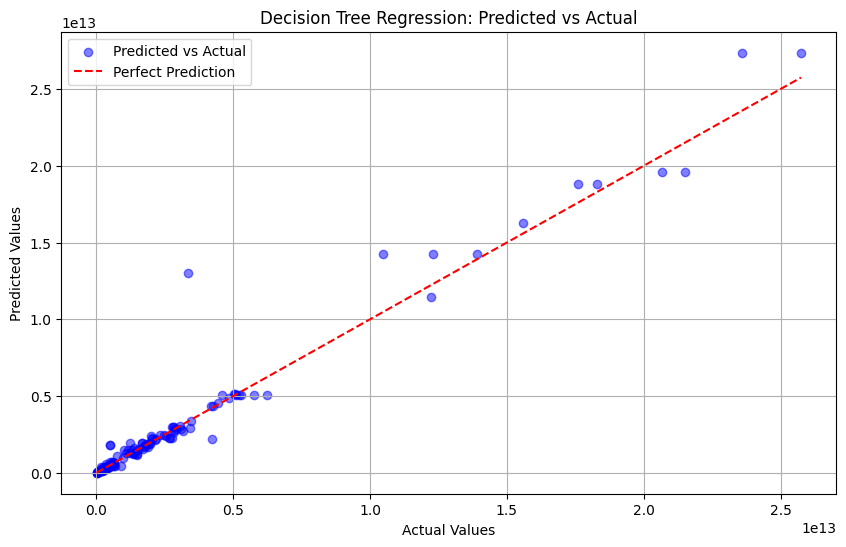

In [40]:
# Plotting y_pred vs y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reg, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
#FYI: use the mean values of y_predic to determine if the model is performinf well
#print('mean of predic:', y_pred.mean())

mean of predic: 2701256178210.296


In [32]:
# import matplotlib.pyplot as plt

# # Create a colormap
# colors = np.linspace(0, 1, len(y_test))

# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, c=colors, label='Predictions vs Actuals')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Line')
# plt.xlabel('Actual Values (y_test)')
# plt.ylabel('Predicted Values (pred_Y)')
# plt.title('Actual vs Predicted Values')
# plt.legend()
# plt.show()